# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Other settings
lang = "en"
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # My note: The weather API requires coordinates, not city names, so we must first get coordinates for the cities
    geo_url = f"{url}/geo/1.0/direct?q={city}&appid={weather_api_key}"
    geo_results = requests.get(url = geo_url).json()
    if isinstance(geo_results, list):
        if len(geo_results) > 0:
            geo_results = geo_results[0]
        else:
            print(f"No geo results for city {city}, skipping")
            continue
    if "lat" not in geo_results or "lon" not in geo_results:
        print(f"Cannot find lat/lon for in geo results for city {city}, skipping")
        continue
    lat = geo_results["lat"]
    lon = geo_results["lon"]
    city_url = f"{url}/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&lang={lang}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url = city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord",{}).get("lat",0)
        city_lng = city_weather.get("coord",{}).get("lon",0)
        city_max_temp = city_weather.get("main",{}).get("temp_max",0)
        city_humidity = city_weather.get("main",{}).get("humidity",0)
        city_clouds = city_weather.get("clouds",{}).get("all",0)
        city_wind = city_weather.get("wind",{}).get("speed",0)
        city_country = city_weather.get("sys",{}).get("country","")
        city_date = pd.Timestamp(city_weather.get("dt",0), unit="s").strftime("%Y-%m-%d %X")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | waingapu
Processing Record 3 of Set 1 | lagoa
Processing Record 4 of Set 1 | vung tau
Processing Record 5 of Set 1 | uliastay
Processing Record 6 of Set 1 | clifton
Processing Record 7 of Set 1 | horta
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
Processing Record 11 of Set 1 | kudahuvadhoo
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | taiohae
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | bongao
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | price
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | vikulovo
Pr

Processing Record 39 of Set 4 | laojunmiao
Processing Record 40 of Set 4 | ancud
Processing Record 41 of Set 4 | wuwei
Processing Record 42 of Set 4 | amga
Processing Record 43 of Set 4 | hithadhoo
No geo results for city san isidro de curuguaty, skipping
Processing Record 44 of Set 4 | nabire
Processing Record 0 of Set 5 | fonadhoo
Processing Record 1 of Set 5 | flin flon
No geo results for city port saint john's, skipping
Processing Record 2 of Set 5 | ilam
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | kiunga
Processing Record 5 of Set 5 | broken hill
Processing Record 6 of Set 5 | hadibu
Processing Record 7 of Set 5 | la passe
Processing Record 8 of Set 5 | metlili chaamba
No geo results for city eidson road, skipping
Processing Record 9 of Set 5 | constantia
Processing Record 10 of Set 5 | luderitz
Processing Record 11 of Set 5 | nehe
Processing Record 12 of Set 5 | ishigaki
Processing Record 13 of Set 5 | san juan de miraflores
Processing Record 14 of Set 5 

Processing Record 32 of Set 8 | newport
Processing Record 33 of Set 8 | sosnovo-ozerskoye
Processing Record 34 of Set 8 | motueka
Processing Record 35 of Set 8 | puerto baquerizo moreno
Processing Record 36 of Set 8 | sona
Processing Record 37 of Set 8 | weno
Processing Record 38 of Set 8 | howrah
Processing Record 39 of Set 8 | mahalapye
Processing Record 40 of Set 8 | brindisi
Processing Record 41 of Set 8 | sao vicente
No geo results for city kolonia town, skipping
Processing Record 42 of Set 8 | mugia
Processing Record 43 of Set 8 | oranjestad
Processing Record 0 of Set 9 | ras el aioun
Processing Record 1 of Set 9 | keila
Processing Record 2 of Set 9 | lib
Processing Record 3 of Set 9 | vingt cinq
Processing Record 4 of Set 9 | sredniy
Processing Record 5 of Set 9 | tomohon
Processing Record 6 of Set 9 | guilin
No geo results for city elmendorf air force base, skipping
Processing Record 7 of Set 9 | sao felix do xingu
Processing Record 8 of Set 9 | kankipadu
Processing Record 9 of

Processing Record 26 of Set 12 | kill devil hills
Processing Record 27 of Set 12 | baoro
Processing Record 28 of Set 12 | new norfolk
Processing Record 29 of Set 12 | el calafate
Processing Record 30 of Set 12 | yangor
Processing Record 31 of Set 12 | kailua-kona
Processing Record 32 of Set 12 | pueblo
Processing Record 33 of Set 12 | ivdel'
Processing Record 34 of Set 12 | ouargaye
Processing Record 35 of Set 12 | molina
Processing Record 36 of Set 12 | ciro marina
Processing Record 37 of Set 12 | chos malal
Processing Record 38 of Set 12 | tvoroyri
Processing Record 39 of Set 12 | mundri
Processing Record 40 of Set 12 | kinablangan
Processing Record 41 of Set 12 | mogocha
Processing Record 42 of Set 12 | bay city
Processing Record 43 of Set 12 | suva
Processing Record 44 of Set 12 | uzgen
Processing Record 0 of Set 13 | aweil
Processing Record 1 of Set 13 | celestun
Processing Record 2 of Set 13 | korotchaevo
-----------------------------
Data Retrieval Complete      
---------------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data=city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,st. john's,47.5615,-52.7126,4.48,98,100,3.09,CA,2024-05-03 04:46:05
1,waingapu,-9.6522,120.2637,29.59,65,20,7.16,ID,2024-05-03 04:48:45
2,lagoa,37.1326,-8.4551,11.71,77,17,2.36,PT,2024-05-03 04:48:45
3,vung tau,10.3486,107.0765,30.26,67,43,5.61,VN,2024-05-03 04:48:46
4,uliastay,47.7416,96.8475,10.95,29,5,1.60,MN,2024-05-03 04:48:47


In [6]:
# Export the City_Data into a csv

import os
directory_path = "output_data"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data

city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5615,-52.7126,4.48,98,100,3.09,CA,2024-05-03 04:46:05
1,waingapu,-9.6522,120.2637,29.59,65,20,7.16,ID,2024-05-03 04:48:45
2,lagoa,37.1326,-8.4551,11.71,77,17,2.36,PT,2024-05-03 04:48:45
3,vung tau,10.3486,107.0765,30.26,67,43,5.61,VN,2024-05-03 04:48:46
4,uliastay,47.7416,96.8475,10.95,29,5,1.60,MN,2024-05-03 04:48:47


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

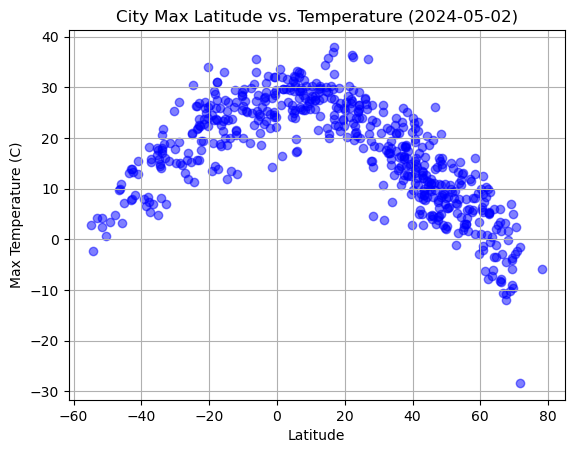

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    x = city_data_df["Lat"],
    y = city_data_df["Max Temp"],
    c = "blue",
    marker = "o",
    alpha = 0.5
)

# Incorporate the other graph properties
from datetime import datetime
plt.title(f"City Max Latitude vs. Temperature ({datetime.now().strftime('%Y-%m-%d')})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

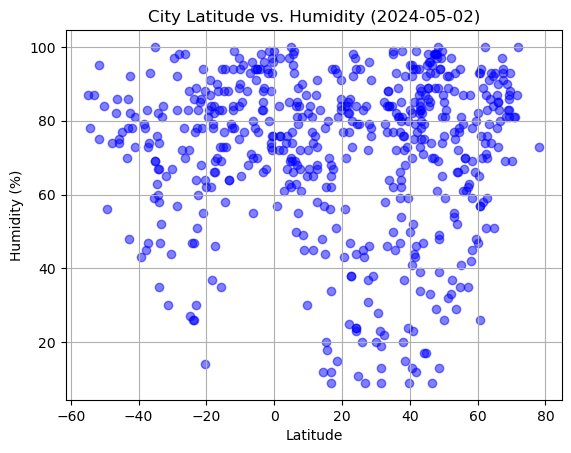

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    x = city_data_df["Lat"],
    y = city_data_df["Humidity"],
    c = "blue",
    marker = "o",
    alpha = 0.5
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({datetime.now().strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

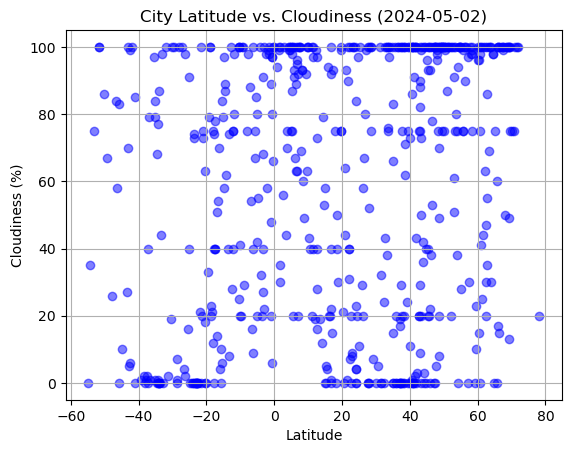

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    x = city_data_df["Lat"],
    y = city_data_df["Cloudiness"],
    c = "blue",
    marker = "o",
    alpha = 0.5
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

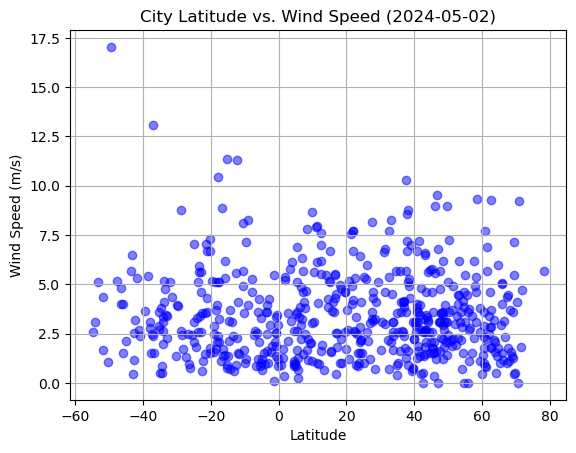

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    x = city_data_df["Lat"],
    y = city_data_df["Wind Speed"],
    c = "blue",
    marker = "o",
    alpha = 0.5
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_regression(x, y, xlabel, ylabel, xtext, ytext):
    # Scatter plot
    plt.scatter(
        x = x,
        y = y,
        c = "blue",
        marker = "o",
        alpha = 0.5
    )
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # Regression line
    corr_coef = np.corrcoef(x, y)[0, 1]
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = [slope * xi + intercept for xi in x]
    plt.plot(x, regression_line, color='red', linewidth=2)
    # Regression equation text
    equation_str = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(xtext, ytext, equation_str, color='red', fontsize=15)
    # Print text
    print(f"The r-value is: {corr_coef}")
    # Show
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5615,-52.7126,4.48,98,100,3.09,CA,2024-05-03 04:46:05
2,lagoa,37.1326,-8.4551,11.71,77,17,2.36,PT,2024-05-03 04:48:45
3,vung tau,10.3486,107.0765,30.26,67,43,5.61,VN,2024-05-03 04:48:46
4,uliastay,47.7416,96.8475,10.95,29,5,1.60,MN,2024-05-03 04:48:47
5,clifton,40.8634,-74.1590,19.81,52,0,6.69,US,2024-05-03 04:42:00


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waingapu,-9.6522,120.2637,29.59,65,20,7.16,ID,2024-05-03 04:48:45
7,waitangi,-35.2705,174.0805,18.09,69,79,2.90,NZ,2024-05-03 04:48:49
8,blackmans bay,-43.0047,147.3180,13.80,78,70,0.45,AU,2024-05-03 04:48:50
11,port-aux-francais,-49.3498,70.2200,3.38,56,67,17.04,TF,2024-05-03 04:48:52
14,taiohae,-8.8991,-140.1559,25.15,77,29,8.25,NaN,2024-05-03 04:48:54


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8783213850729865


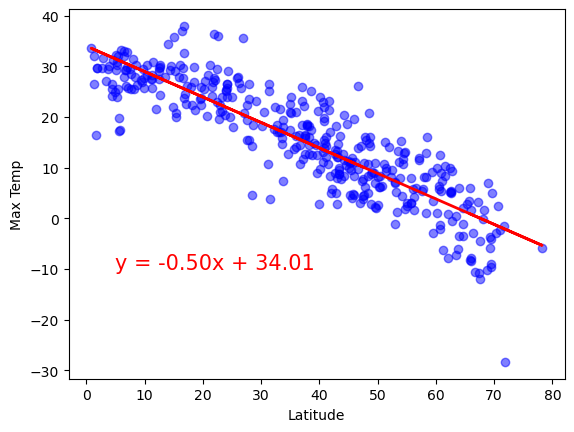

In [24]:
# Linear regression on Northern Hemisphere

plot_regression(
    x = northern_hemi_df["Lat"], 
    y = northern_hemi_df["Max Temp"],
    xlabel = "Latitude",
    ylabel = "Max Temp",
    xtext = 5,
    ytext = -10
)

The r-value is: 0.784829037167462


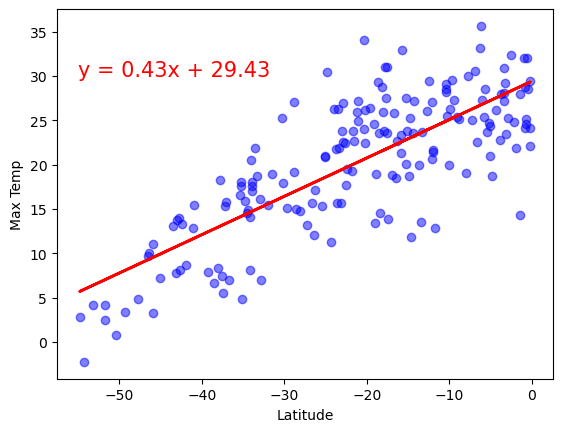

In [23]:
# Linear regression on Southern Hemisphere

plot_regression(
    x = southern_hemi_df["Lat"], 
    y = southern_hemi_df["Max Temp"],
    xlabel = "Latitude",
    ylabel = "Max Temp",
    xtext = -55,
    ytext = 30
)

**Discussion about the linear relationship:** When we look at the relationship between latitude and max temperature, we see a parabolic trend. Temperature is lowest at the positive and negative extreme ends, and highest near 0 at the equator. In northern hemisphere, as latitude increases, temperature decreases, because latitude is getting farther away from 0. In the southern hemisphere, as latitude increases, temperature increase, because latitude is getting closer to 0. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1198092576640458


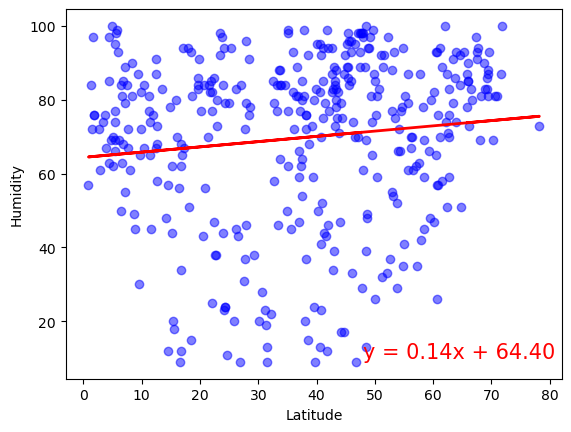

In [17]:
# Northern Hemisphere

plot_regression(
    x = northern_hemi_df["Lat"], 
    y = northern_hemi_df["Humidity"],
    xlabel = "Latitude",
    ylabel = "Humidity",
    xtext = 48,
    ytext = 10
)

The r-value is: 0.22890854428082702


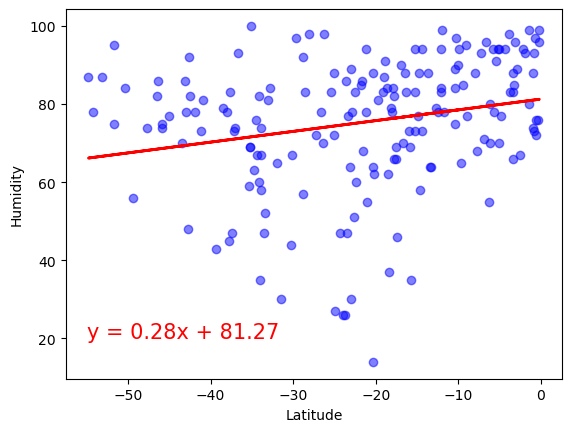

In [18]:
# Southern Hemisphere

plot_regression(
    x = southern_hemi_df["Lat"], 
    y = southern_hemi_df["Humidity"],
    xlabel = "Latitude",
    ylabel = "Humidity",
    xtext = -55,
    ytext = 20
)

**Discussion about the linear relationship:** Both the northern and southern show slightly positive relationship between latitude and humidity, meaning that as latitude increases, humidity increases. However, it's a very weak relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08224060490945667


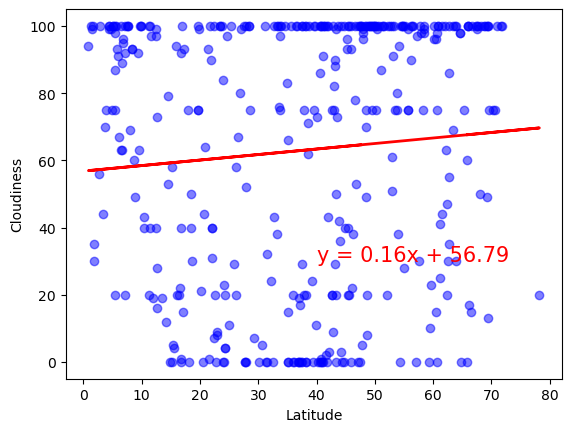

In [19]:
# Northern Hemisphere

plot_regression(
    x = northern_hemi_df["Lat"], 
    y = northern_hemi_df["Cloudiness"],
    xlabel = "Latitude",
    ylabel = "Cloudiness",
    xtext = 40,
    ytext = 30
)

The r-value is: 0.2056517192963491


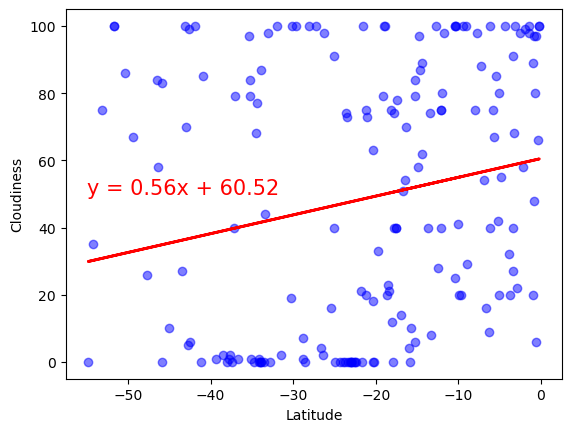

In [25]:
# Southern Hemisphere

plot_regression(
    x = southern_hemi_df["Lat"], 
    y = southern_hemi_df["Cloudiness"],
    xlabel = "Latitude",
    ylabel = "Cloudiness",
    xtext = -55,
    ytext = 50
)

**Discussion about the linear relationship:** Both the northern and southern show slightly positive relationship between latitude and cloudiness, meaning that as latitude increases, cloudiness increases. However, it's a very weak relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.05152339349952


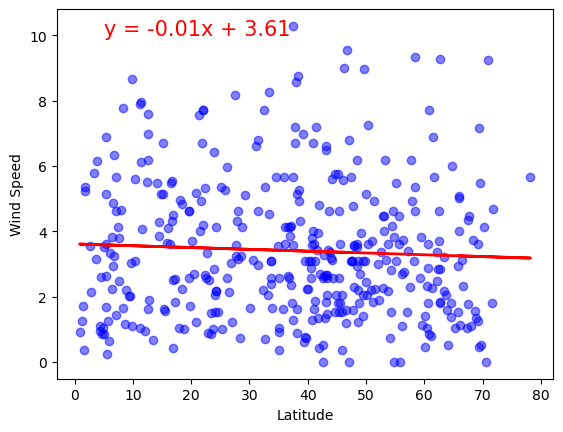

In [21]:
# Northern Hemisphere

plot_regression(
    x = northern_hemi_df["Lat"], 
    y = northern_hemi_df["Wind Speed"],
    xlabel = "Latitude",
    ylabel = "Wind Speed",
    xtext = 5,
    ytext = 10
)

The r-value is: -0.14163630394714272


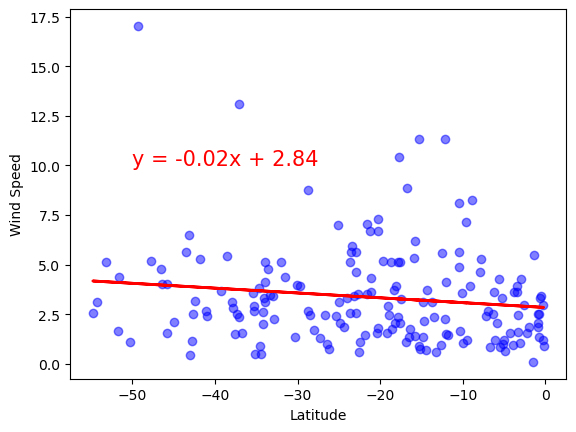

In [26]:
# Southern Hemisphere

plot_regression(
    x = southern_hemi_df["Lat"], 
    y = southern_hemi_df["Wind Speed"],
    xlabel = "Latitude",
    ylabel = "Wind Speed",
    xtext = -50,
    ytext = 10
)

**Discussion about the linear relationship:** Both the northern and southern show near zero relationship between latitude and wind speed, meaning that latitude doesn't hold any predictive power over wind speed.